In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from zipfile import ZipFile

In [2]:
import os.path
from os import path

In [3]:
from unet_config import config
from utils import plot_heartecg

In [4]:
model_config = config()

In [5]:
print(model_config)

{'hdf_ECG_file': 'pregnancy_data_training_long.h5', 'cropped_singleton_ECG_dataset': 'cropped_singleton_ECG', 'hdf_ECG_file_predictions': 'model_predictions.h5', 'predictions_1': 'predictions_1', 'predictions_2': 'predictions_2', 'data_path': 'data', 'length_data_points': 495, 'length_data': 147443, 'data_points_train': 30, 'data_points_test': 10, 'missing_patients': [63, 485], 'exclude_patients': [18, 103, 141, 151, 382], 'source_names': ['heart_rates'], 'random_snippet': True, 'chuffle_chance': 0.5, 'transform_chance': 0.2, 'validation_split': 0.2, 'init_sup_sep_lr': 1e-05, 'batch_size': 3, 'epochs': 30, 'epoch_it': 2000, 'cache_size': 4000, 'num_layers': 5, 'kernel_size': 15, 'num_channels': 4, 'num_channels_output': 8, 'merge_filter_size': 5, 'output_filter_size': 1, 'num_initial_filters': 24, 'padding': 'valid', 'input_size': 22050, 'dropout_rate': 0.2, 'expected_sr': 22050, 'mono_downmix': True, 'output_path': 'C:/Users/kirin/Documents/Internship/output', 'output_type': 'direct',

In [6]:
# This is a general dataset that can contain multiple datasets, 
# now I'm adding the single ECG data to the dataset
# Loop over all heart ECG recordings, store them in an array and put them in hdf file

cropped_length_data_points = model_config["length_data_points"] - len(model_config["exclude_patients"])

# Check if hdf file has already been created
if not os.path.exists(model_config["hdf_ECG_file"]): 

    d = np.empty((cropped_length_data_points, model_config["num_channels"], model_config["length_data"]))
    i = 0

    for datapoint in range(1,model_config["length_data_points"]+1):
        # patient 63 and 485 are missing
        if datapoint in model_config["missing_patients"]: continue
        if datapoint in model_config["exclude_patients"] : continue

        file_name = ''
        if datapoint < 10:
            file_name = 'Data/singleton_pregnancies_ex/patient_'+ '00' + str(datapoint)+'.signal'
        elif datapoint < 100: 
            file_name = 'Data/singleton_pregnancies_ex/patient_'+ '0' + str(datapoint)+'.signal'
        else: 
            file_name = 'Data/singleton_pregnancies_ex/patient_' + str(datapoint)+'.signal'

        with h5py.File(file_name, 'r') as f:

            data = f['data']
            data = np.array(data)

            start_x = data.shape[0] // 2 - model_config["length_data"] // 2

            # Remove the first many columns from the data
    #         data = np.delete(data, np.s_[:104248], 1)
            # Ik kan hier meer snippets op random plekken pakken 
            data = np.delete(data, np.s_[start_x:start_x + model_config["length_data"]], 1)
    #         data = data[start_x:start_x + model_config["length_data"]]

            # Resize to make right dimensions 
            data = np.resize(data,(model_config["num_channels"], model_config["length_data"]))

            d[i] = data
            i += 1

    # Add dataset to hdf file
    with h5py.File(model_config["hdf_ECG_file"], 'a') as hf:
        hf.create_dataset(model_config["cropped_singleton_ECG_dataset"], data=d)

printing the data (for visualisation)

In [8]:
# for datapoint in range(1,model_config["length_data"]+1):
#     # patient 63 and 485 are missing
#     if datapoint in model_config["missing_patients"]: continue
#     if datapoint in model_config["exclude_patients"] : continue
    
#     file_name = ''
#     if datapoint < 10:
#         file_name = 'Data/singleton_pregnancies_ex/patient_'+ '00' + str(datapoint)+'.signal'
#     elif datapoint < 100: 
#         file_name = 'Data/singleton_pregnancies_ex/patient_'+ '0' + str(datapoint)+'.signal'
#     else: 
#         file_name = 'Data/singleton_pregnancies_ex/patient_' + str(datapoint)+'.signal'
    
#     f = h5py.File(file_name, 'r')
    
#     data = f['data']
    
#     print('Patient number:', datapoint)
#     print('Length sequence:', data.shape[1])
    
#     #plot_heartrate(data[0], datapoint)

Patient number: 1
Length sequence: 912999
Patient number: 2
Length sequence: 703999
Patient number: 3
Length sequence: 914998
Patient number: 4
Length sequence: 891998
Patient number: 5
Length sequence: 1026999
Patient number: 6
Length sequence: 895998
Patient number: 7
Length sequence: 811999
Patient number: 8
Length sequence: 1031999
Patient number: 9
Length sequence: 966998
Patient number: 10
Length sequence: 763999
Patient number: 11
Length sequence: 757998
Patient number: 12
Length sequence: 877998
Patient number: 13
Length sequence: 962098
Patient number: 14
Length sequence: 953598
Patient number: 15
Length sequence: 985398
Patient number: 16
Length sequence: 919598
Patient number: 17
Length sequence: 749398
Patient number: 19
Length sequence: 309798
Patient number: 20
Length sequence: 1066699
Patient number: 21
Length sequence: 1117098
Patient number: 22
Length sequence: 923998
Patient number: 23
Length sequence: 877298
Patient number: 24
Length sequence: 955298
Patient number: 

Patient number: 203
Length sequence: 918748
Patient number: 204
Length sequence: 914998
Patient number: 205
Length sequence: 914873
Patient number: 206
Length sequence: 884498
Patient number: 207
Length sequence: 912873
Patient number: 208
Length sequence: 1079498
Patient number: 209
Length sequence: 838748
Patient number: 210
Length sequence: 890373
Patient number: 211
Length sequence: 730123
Patient number: 212
Length sequence: 928748
Patient number: 213
Length sequence: 893749
Patient number: 214
Length sequence: 920873
Patient number: 215
Length sequence: 775123
Patient number: 216
Length sequence: 832123
Patient number: 217
Length sequence: 971374
Patient number: 218
Length sequence: 1008498
Patient number: 219
Length sequence: 876974
Patient number: 220
Length sequence: 343758
Patient number: 221
Length sequence: 991624
Patient number: 222
Length sequence: 1021373
Patient number: 223
Length sequence: 899373
Patient number: 224
Length sequence: 1081998
Patient number: 225
Length s

Checking if data loading went well

cropped_singleton_ECG
pre-transpose (4, 147443)


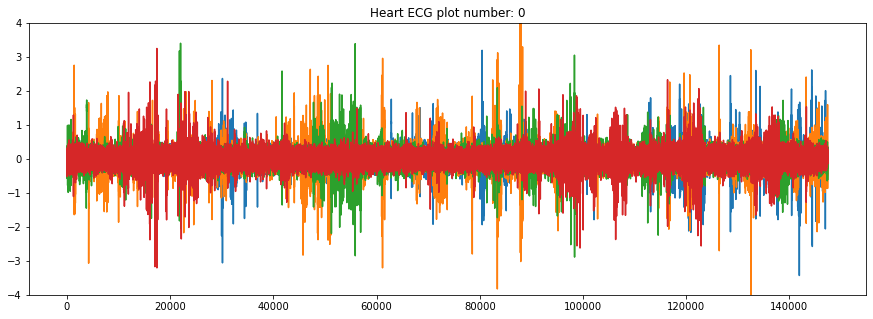

post-transpose (147443, 4)


In [8]:
with h5py.File(model_config["hdf_ECG_file"], 'r') as f:
    #print("Keys: %s" % f.keys())
    singleton_key = list(f.keys())[0]
    
    print(singleton_key)

    # Get the data
    data = np.array(f[singleton_key])
    
    print('pre-transpose', data[0].shape)
    
    plot_heartecg(data[0].T)
    
    print('post-transpose', data[0].T.shape)

In [7]:
# # This is a general dataset that can contain multiple datasets, 
# # now I'm adding the single ECG data to the dataset
# # hdf_ECG_file = 'pregnancy_data_small_Unet_test.h5'
# # cropped_singleton_ECG_dataset = 'cropped_singleton_ECG'
# # cropped_twin_ECG_dataset = 'cropped_twin_ECG'

# cropped_length_data = model_config["length_data"] - len(model_config["exclude_patients"])

# # Check if hdf file has already been created
# if not os.path.exists(model_config["hdf_ECG_file"]): 

#     d = np.empty((cropped_length_data, model_config["num_channels"], model_config["input_size"]))
#     i = 0

#     for datapoint in range(1,model_config["length_data"]+1):
#         # patient 63 and 485 are missing
#         if datapoint in model_config["missing_patients"]: continue
#         if datapoint in model_config["exclude_patients"] : continue

#         file_name = ''
#         if datapoint < 10:
#             file_name = 'Data/singleton_pregnancies_ex/patient_'+ '00' + str(datapoint)+'.signal'
#         elif datapoint < 100: 
#             file_name = 'Data/singleton_pregnancies_ex/patient_'+ '0' + str(datapoint)+'.signal'
#         else: 
#             file_name = 'Data/singleton_pregnancies_ex/patient_' + str(datapoint)+'.signal'

#         f = h5py.File(file_name, 'r')

#         data = f['data']
#         data = np.array(data)
        
#         start_x = data.shape[0] // 2 - model_config["input_size"] // 2
        
#         # Remove the first many columns from the data
# #         data = np.delete(data, np.s_[:104248], 1)
#         data = np.delete(data, np.s_[start_x:start_x + model_config["input_size"]], 1)
# #         data = data[start_x:start_x + model_config["'input_size'"]]

#         # Resize to make right dimensions 
#         data = np.resize(data,(model_config["num_channels"], model_config["input_size"]))

#         d[i] = data
#         i += 1
        
#         f.close()

#     # Add dataset to hdf file
#     hf = h5py.File(model_config["hdf_ECG_file"], 'w')
#     hf.create_dataset(model_config["cropped_singleton_ECG_dataset"], data=d)

In [8]:
# hf.close()